In [2]:
import pandas as pd
import plotly.express as px

# 2 lines below for html export
import plotly.io as pio
pio.renderers.default ='notebook'

# 2 lines below for PDF export
#!pip install Pyppeteer
#!pyppeteer-install

from IPython.display import YouTubeVideo

# Models Vs Reality



In [9]:
#YouTubeVideo("W4OczhN3Z7U", height=600, width=1000, start=47, end=(8*60+44))
#Youtube video of just the model vs reality

## Introduction

Why Image Processing? Is this not a Computer Vision module?\
While image processing is a large field in its own right it is generally
considered to be a task that changes an image in some way for the sake
of the human viewer.\
However, in many cases it is also the first stage of computer vision
applications.\
It is generally thought of as a pre-processing step which modifies the
image in such a way as to make it more suitable for computer analysis.

## Point operators or point processes

The simplest of image processing operators are the point operators.
These are operators that manipulate or change each pixel in an image
independently of the pixels around it (referred to as neighbours).
Examples:

-   Brightness adjustment.

-   Contrast adjustment.

-   Colour correction.

-   Colour transforms.

In [10]:
#YouTubeVideo("W4OczhN3Z7U", height=600, width=1000)
            
#Youtube video of Point operators and point processes


### Operator

An operator in image processing is a function which takes a pixel value
and produces a new pixel value.

$g(\vec{x}) = h(f(\vec{x}))$

Usually for an image (in the continuous domain),
$\vec{x} \in \mathbb{R}^2$ if it is a grey scale image
and $\vec{x} \in \mathbb{R}^3$ for a colour image.


When we deal with digital images we move from $\mathbb{R} \to \mathbb{Z}$. 


This means that digital images are discrete(sampled) images, and each pixel has a location in a 2D plane. 
$\vec{x}=(i,j)^\top$ 

and therefore $g(i,j) = h(f(i,j))$. 



$f$ and $g$ are images, and $h$ is the pixel transformation from $f \to g$.

Let's look at an example transformation.
$    g(\vec{x}) = af(\vec{x}) + b$

What will this do?


## Transformations

$af(\vec{x})$ will multiply each pixel brightness value by $a$.

While $+b$ simply adds a constant brightness value $b$ to each pixel.


$a$ would often be called gain and $b$ bias.

You may also notice that this is the equation of a line with y-intersect $b$ and slope $a$. 



So you could graph this function against the input pixel brightness range to see what value of the output pixel brightness value will be.

!["Collage of four images in a 2x2 grid. Top left: low-contrast black and white photo of a labeled car beside a building, details are soft and less distinct. Bottom left: high-contrast version of the first image with bolder light and dark areas. Top right: histogram of the top left image, values are not spread over the full intensity range, indicative of low contrast. Bottom right: histogram of the bottom left image, values are spread across a larger range of intensity values, characteristic of high contrast."](images/LowAndHighContrast.png)  


In the figure above the images in the left column are the same but have different contrast. The top left has low contrast while the bottom right has high contrast. Take a look at the corresponding histograms to see how the histogram captures and displays this attribute of images.

See how the histogram of an image is created in python in the cell below.
- Try a different image
- Try a colour image


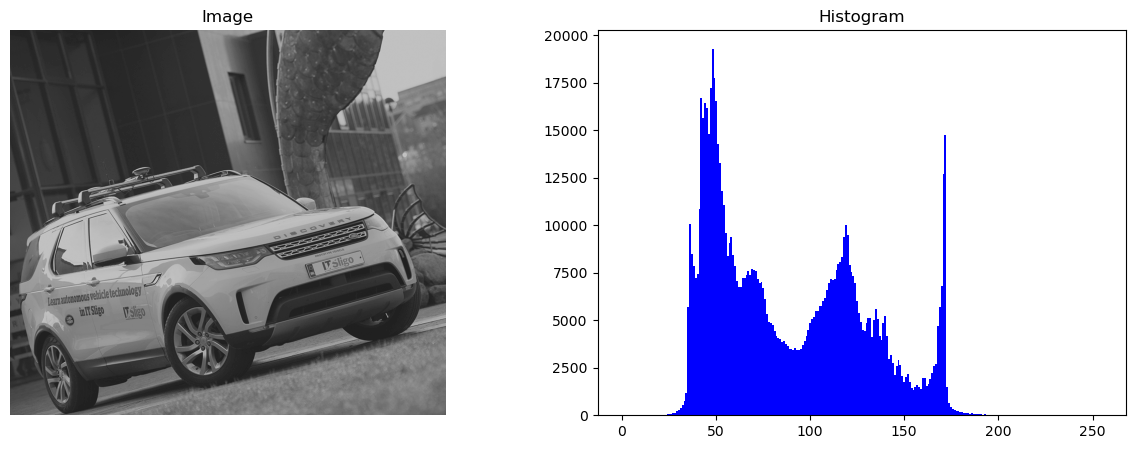

In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
# Function to create and display a histogram beside the original image
def display_image_histogram(img):
       
    
    # Create a histogram for the image
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Display the image
    ax1.imshow(img, cmap='gray')
    ax1.set_title('Image')
    ax1.axis('off')  # Hide axes as this is just an image not a graph
    
    # Display the histogram
    ax2.hist(img.flatten(), bins=256, range=(0,255), color='blue')
    ax2.set_title('Histogram')
    
    # Show the plot
    plt.show()


# Open the image file
img = cv2.imread('images/CAV15LowContrast.jpg', cv2.IMREAD_GRAYSCALE)
display_image_histogram(img)  


## Saturation

A word of warning, though. 
Digital images have a minimum and maximum brightness. 
The above may be a linear function (strictly speaking, Affine function), but once the output reaches the maximum value allowed in the digital image then it cannot go any brighter. 

This is important for two reasons. 

- Firstly, we lose any information that hits this maximum value, so later computer vision algorithms may not be able to do anything with it. Secondly, the operation becomes irreversible. 

- If you have stayed within the range this operation can be reversed by
$ f(\vec{x}) = \frac{g(\vec{x}) - b}{a}$

note the order of operations, the subtract must take place first, and then the division. 

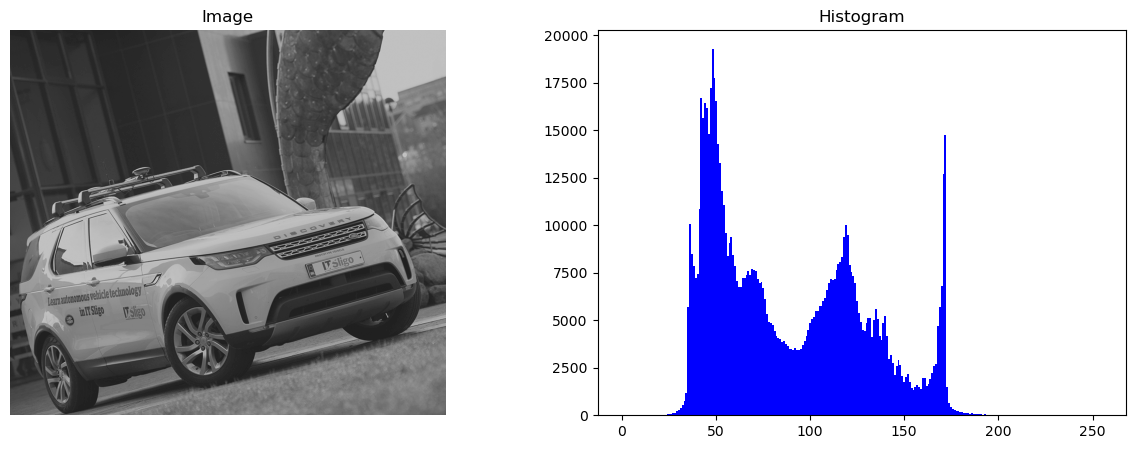

Max pixel value of original image is 225
Max pixel value of res_img is 255.0
Max pixel value of res_img is now 255.0


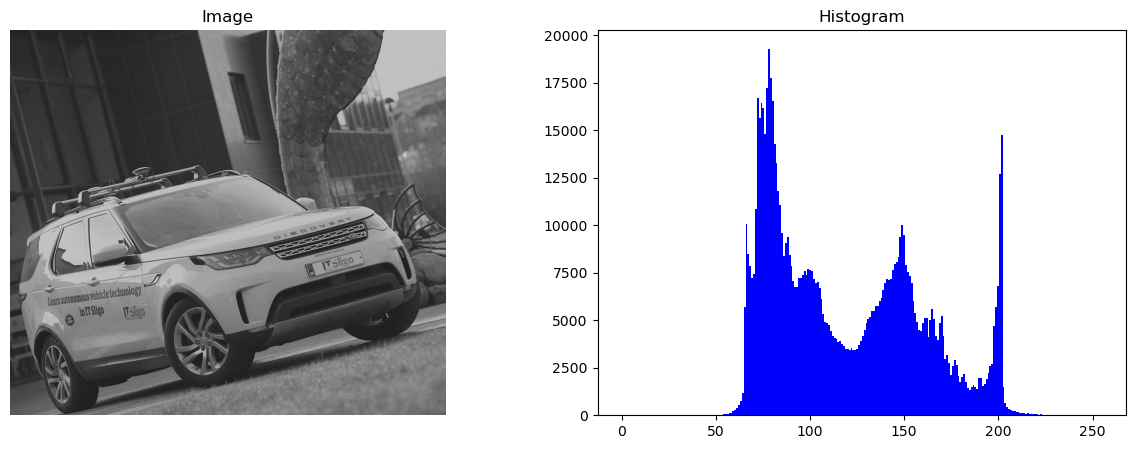

In [30]:
img = cv2.imread('images/CAV15LowContrast.jpg', cv2.IMREAD_GRAYSCALE)
display_image_histogram(img)  
'''display the input image and its histogram. 
We created the display_image_histogram function in a 
cell above but if you have not run that cell, 
the python interpreter will not know about it.'''

# make sure to use floats for a and b. i.e. 2.0 not 2 and 20.0 not 20
a = 1.0 # this is a from ax+b in the cells above
b = 0.0 # this is b from ax+b in the cells above
'''every pixel in the image will be treated separately as the x in ax+b and 
put the result in a new image which we will call res_img for result image '''
print(f'Max pixel value of original image is {np.max(img)}')
res_img = a*img + b # res_image may end up with pixels that are higher than 255
print(f'Max pixel value of res_img is {np.max(res_img)}') 
res_img[res_img>255]=255 # set any pixels above 255 to 255.
#What happens if you comment out the line above?
print(f'Max pixel value of res_img is now {np.max(res_img)}')
res_img = np.uint8(res_img) # re quatize back to 8-bit integers

''' After viewing this for a while, try to write some code to reverse the operation
What happens if you place this code here versus placing 
it before the res_img[res_img>255]=255 code.'''

display_image_histogram(res_img)  #display the output image and its histogram



Also note that in a digital image, operations are rarely perfectly reversible even if the maths says they should be. 

We regularly end up with floating point values that must be re-quatized to discrete values. 

The same will happen during the reverse operation but it cannot undo the original re-quantization instead it will just add its own.

Therefore repeated operations will cumulatively add quantization noise. 
This is something to always keep in mind when performing image processing calculations.

You can test this by implementing a loop in the code above that applies an operation and its reverse a desired number of times, including the re-quatization back to uint8.

**Pro-Tip:** If possible, do all image processing operations without converting to discrete values in between.

Consider the following function:
$ g(\vec{x}) = a(\vec{x})f(\vec{x}) +b(\vec{x})$

Now both $ a $ and $b$ are functions of $\vec{x}$ instead of just constant values, which means that their value varies depending on position. 

What are the functions $a()$ and $b()$? 

Well they are not defined here, so they could be anything. 



## Graduated filter

Consider the graduated filter below. This falls int the category of $a(\vec{x})$ in the function $ g(\vec{x}) = a(\vec{x})f(\vec{x}) +b(\vec{x})$.

Here $\vec{x}$ values close to the top will have a low value while $\vec{x}$ values close to the bottom have a higher value. Values of $\vec{x}$ vary gradually (hence graduated) in between.

!["There are three images shown horizontally. The left image depicts two SUVs on a paved surface, with a metallic fish sculpture in the background. The left SUV is black, branded with "Valeo" and "Sightstream," and the right one is white, displaying "Learn autonomous vehicle technology in IT Sligo." Both SUVs seem equipped with autonomous driving technology, given the devices mounted on their roofs. In the background, there are leafless trees, parked cars, and some buildings, under a grey overcast sky. The image in the middle  displays a gradient transition from a dark shade at the top to a lighter shade at the bottom. The image on the right is the same image as on the left but now has discernable detail in the sky as it has had the graduated filter applied to it."](images/GraduatedFilter3.png)

## Operations combining two images

Consider the following function.
$ g(\vec{x}) = (1-\alpha)f_0(\vec{x}) + \alpha f_1(\vec{x})$

This will blend two images into one, taking $\alpha$ times the brightness of image $f_1$ and $(1-\alpha)$ times the brightness of image $f_0$.

$\alpha$ is in the range $[0,1]$ 
And of course $\alpha$ could be a function of $\vec{x}$ where we would blend differently at different positions in the image.

## Non-linear Point operations

Let's look at a non-linear point operation.
$g(\vec{x}) = [f(\vec{x})]^{\gamma}$


$f(\vec{x})\in[0,1]$

This operation is usually referred to as gamma correction.
Which suggests that it is correcting for something.

In most camera systems the mapping from input radiance to quantized pixel values is a non-linear one. 

Gamma correction can be applied later to undo this.

A $\gamma = 2.2$ will suit well for most digital cameras.

Screens and monitors also undergo some gamma correction and you can usually play with this in the settings of the monitor.

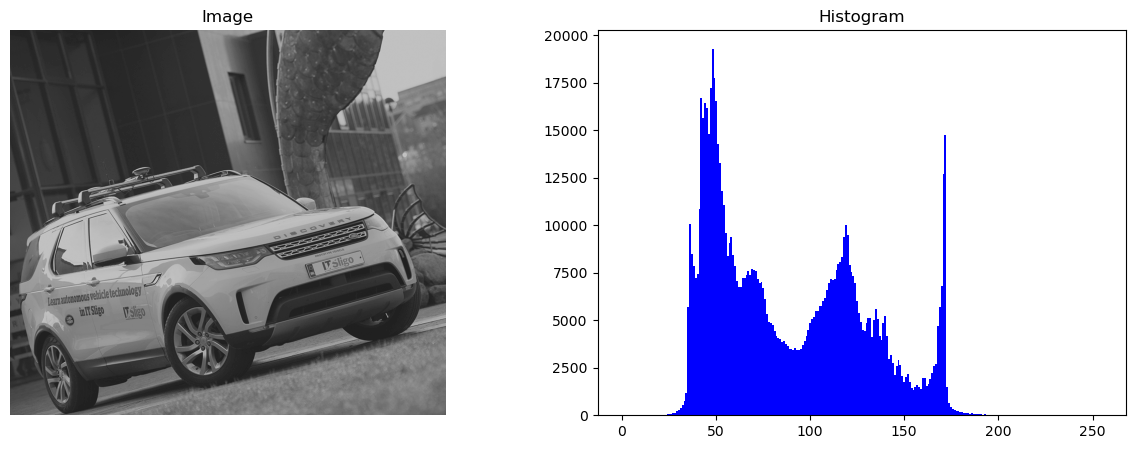

Max pixel value of res_img is 0.9875616889893374
Max pixel value of res_img is now 0.9875616889893374


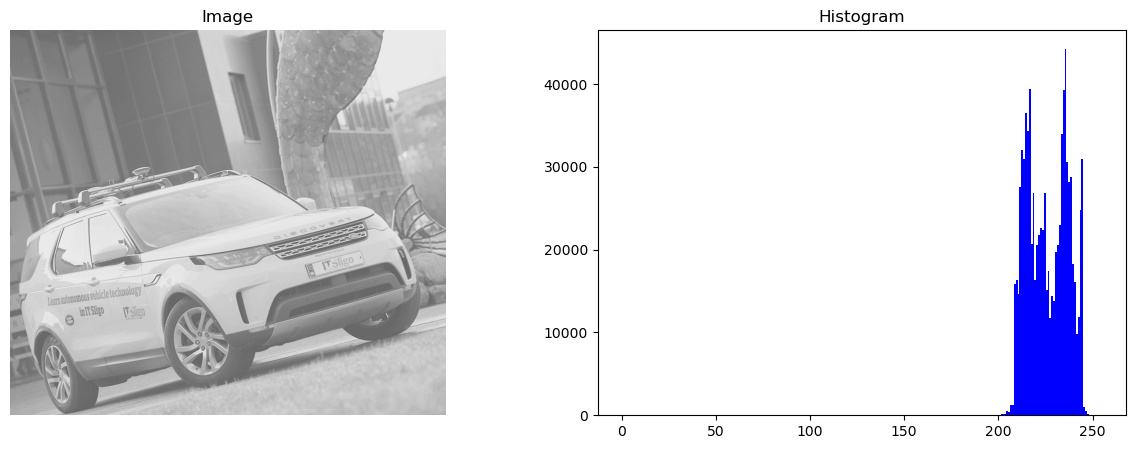

In [25]:
img = cv2.imread('images/CAV15LowContrast.jpg', cv2.IMREAD_GRAYSCALE)
display_image_histogram(img)  
'''display the input image and its histogram. '''


gamma = 0.1 # this is a from the non-linear operation above
#try a few gamma values

'''every pixel in the image will be treated separately as the x in the 
gamma correction operation and 
put the result in a new image which we will call res_img for result image '''
img = img/255.0 #convert image to range [0-1]
res_img = img**gamma # res_image may end up with pixels that are higher than 255
print(f'Max pixel value of res_img is {np.max(res_img)}') 
res_img[res_img>1.0]=1.0 # set any pixels above 1.0 to 1.0.
#Note that for the gamma function it will never saturate so the above line can be removed
print(f'Max pixel value of res_img is now {np.max(res_img)}')
res_img = res_img*255 # convert the resulting image back to range [0-255]
res_img = np.uint8(res_img) # re quatize back to 8-bit integers

''' After viewing this for a while, try to write some code to reverse the operation
What happens if you place this code here versus placing 
it before the res_img[res_img>255]=255 code.'''

display_image_histogram(res_img)  #display the output image and its histogram

## Colour Transforms

Consider an RGB (Red, Green, Blue) image. 

We could consider these to be three separate gray scale images $r(\vec{x})$, $g(\vec{x})$ and $b(\vec{x})$. 

If we decide to brighten each of these individually by the same amount and then recombine them, we may get a nasty surprise.

As well as brightening we may get quite a bit of colour drift. 

Colours may change in an unnatural way, e.g. Skin tones may appear unnatural. 

The problem we have encountered is that colour channels are highly correlated with each-other, so treating them independently can have poor consequences. 

The better option here would be to try to separate brightness from colour, e.g. YUV, YIQ or CIE-L*a*b*. which single out the brightness value as Y or L respectively.
We would then only apply the brightness change to the brightness/luminance channel and then reconvert to RGB giving a better result.

Note of Caution: some libraries (e.g. OpenCV) use BGR, so if you notice the colour looks odd then this should be the first place that you look for a solution.

We may of course want to change the colours of an image.

Most often in pre-processing this would take the form of colour balance corrections.

A problem exists that different light sources have different colours.

Sunlight is quite blue in tone. 
Fluorescent, LED, camera flash, tungsten all have different colours. 
Many digital cameras allow you to set this in camera or the camera will try to guess. 

In many cases there are competing light sources in an image and a single correction is not globally effective. 

In these cases we would like uniform gray parts of the image to be gray and white parts to be white. 

There are many algorithms for doing this from individually modifying each of the channels separately to converting to a colour space that separates out colour and then making global changes that move gray parts of the image to values in that space that have zero colour. 

Every other pixel moves in the same direction. 
Then convert back to RGB.

## Colour Conversions
If you want to convert from Colour to YIQ 
Let's assume we have the following values RGB values R = 126, G=120, B=200.
    
The Matrix $C$ is a linear transformation from RGB to YIQ, where $C$ is defined as follows.

$$ C = \begin{bmatrix}  0.299       & 0.587  & 0.114 \\
                0.596       & -0.274  & -0.322  \\
                0.211        & -0.523   & 0.312  
            \end{bmatrix} $$

assuming a pixel $\vec{p}_{rgb}$ with RGB values of
$$ \vec{p}_{rgb} = \begin{bmatrix}
            126       \\
            120        \\
            200         
            \end{bmatrix} $$
            
            
$$ C\vec{p}_{rgb}=\vec{p}_{yiq}$$
       
$\vec{p}_{yiq}= \begin{bmatrix}
                0.299       & 0.587  & 0.114 \\
                0.596       & -0.274  & -0.322  \\
                0.211        & -0.523   & 0.312  
            \end{bmatrix}$
            $\begin{bmatrix}
            126       \\
            120        \\
            200         
            \end{bmatrix} =$ 
            $\begin{bmatrix}
            131       \\
            -22        \\
            26         
            \end{bmatrix} $

## Compositing and Matting

Matting refers to extracting an object from an image.
Compositing refers to inserting this object into another image without noticeable artefacts (i.e. it should not be obvious that it was not part of the original image). 

Blue/Green screens are often used to make this process easier.

Some terms to be familiar with here are foreground, background and $\alpha$ (alpha).
Usually we talk about the foreground as being the object that is matted from the background of one image and composited into the background of another image.

$\alpha$ is a fourth channel that is added to our three-channel image (e.g. RGB). 
$\alpha \in [0,1]$ is the transparency/opacity at each pixel.

So in an $\alpha$-matted image a pixel that is definitely in the foreground object we want to take has an $\alpha=1$ (fully opaque). 

Pixels that are definitely outside the object, i.e. background have $\alpha=0$ (fully transparent). 

When the boundary of the foreground object with background is not distinct (e.g. a hair that is thinner than a pixel) then $\alpha$ is between 0 and 1.

Then to composite the object onto a new background image we use the following equation, called the over-operator.
$C = (1-\alpha)B + \alpha F.$

Where B is background and F is foreground. 

Depending on the application we sometimes pre-multiply $\alpha F$ and store in the $\alpha$-matted image. 

In other cases this is left until later.

There are other functions other than the over-operator, but this will suffice for now.

## Contrast Stretching

The brightness and gain mentioned earlier are useful but require human judgement. 
In Computer Vision we must always consider if values can be automatically determined by some mechanism.

Contrast stretch is one option here. 
It aims to make the most use of the dynamic range available. e.g. in an 8-bit image $[0,255] \rightarrow{[v_{min},v_{max}]}$. 

Find the darkest pixel in the image, $u_{min}$. 
Find the brightest pixel called $u_{max}$.  

Now change $u_{min}$ to match $v_{min}$ and $u_{max}$ to match $v_{max}$ and stretch every other pixel linearly between those two points.


\begin{equation}
    T(u) = 
            \begin{cases}
            v_{min} & \text{if } u<u_{min}\\
            v_{min}+\frac{(v_{max} - v_{min})(u-u_{min})}{u_{max}-u_{min}} & \text{if } u_{min}<u<u_{max}\\
            v_{max} & \text{if } u>u_{max}
            \end{cases}
\end{equation}

## Histogram Equalisation.

We can take this idea to its logical extreme, i.e. that we should have the same number of pixels of each brightness value and that the resulting image should have a histogram that is flat from $v_{min}$ to $v_{max}$.

To calculate how to do this we need to start with the histogram of the original image which we will call $h(i)$ where $i$ is the brightness value.

We can then borrow a common function from statistics, the cumulative distribution $c(I)$

\begin{equation}
    c(I) = \frac{1}{N}\sum_{i=0}^I h(i) = c(I-1)+\frac{1}{N}h(I),
\end{equation}

N is the number of pixels in the image. For a given brightness value $i$ we can look up its corresponding percentile $c(I)$ and from this determine the final value the pixel should take. Both $I,c \in [0, 255]$ for an 8-bit image. i.e. if $M=256$

\begin{equation}
    c(I) = \frac{M}{N}\sum_{i=0}^I h(i) = c(I-1)+\frac{M}{N}h(I),
\end{equation}

Note that the result will be real numbers $\in [0,M-1]$ and will have to be requantized to integers $\in [0,M-1]$ and this will lead to some roughness in the final histogram.

An example is shown below, but take care to note, that while the example below appears to have made the image more asthetically pleasing this is rarely the case with Histogram Equalisation, which can often make an image look unrealistic and overly contrasty. However, the point of Histogram Equalisation is not to make the image look good but to make the most use of the dynamic range to see differences in parts of the image. For this reason it may often be a first step before feeding to an ensemble of computer vision tasks.

!["Collage of four images in a 2x2 grid. Top left: low-contrast black and white photo of a labeled car beside a building, details are soft and less distinct. Bottom left: high-contrast version of the first image with bolder light and dark areas. Top right: histogram of the top left image, values are not spread over the full intensity range, indicative of low contrast. Bottom right: histogram of the bottom left image, values are spread across the full range of intensity values, characteristic of high contrast."](images/HistogramEqualisation.png)  

## Linear Filtering

The logical progression from point operators is to use multiple pixels to produce the **processed** output pixel.
This normally takes the form of using a neighbourhood of pixels to produce the output pixel. 
$n\times n$ where $n$ is an odd number are the normal shape of these, i.e. symmetrical around the pixel with $3\times3$ being the smallest possible ($1\times1$ is just a point operator). 

As the name suggests, these are linear operations which means that the order in which they occur doesn't matter and they obey all the other rules of linearity such as homogeneity and additivity.

Once again this is only in the pure mathematical sense. 
We break linearity if the result at any point drops outside the range of our min/max values.

And when our pixel is an edge pixel we get non-linear effects so it works differently than a pixel that is in the internal of the image. 

Note that for an $n\times n$ operator, an edge pixel is any pixel within $(n-1)/2$ of the edge and every pixel closer to the edge the further from the linear operation we get.


## Correlation operator.

\begin{equation}
    g(i,j)=\sum_{k,l}f(i+k, j+l)h(k,l)
\end{equation}

\begin{equation}
    g=f \otimes h
\end{equation}
With $h(k,l)$ being the filter coefficients.



## Convolution Operator
Convolution operator.}
\begin{equation}
    g(i,j)=\sum_{k,l}f(i, j)h(i-k,j-l)
\end{equation}

\begin{equation}
    g=f \ast h
\end{equation}
With $h(k,l)$ being the filter coefficients.

## Point Spread Function (PSF)

If you've taken a class in DSP you can think of $h(k,l)$ as a two-dimensional impulse response. In image processing this is more commonly called a PSF (Point Spread Function). 

Convolution/correlation, in addition to being a linear operator is also shift invariant (subject to the usual assumptions which we will no longer continue to state but should always be aware of).

Think of this as the operator behaves the same no matter where it is in the image.

## Border Effects

What should we do with the situation where the filter goes off the edge of the image?

There are many solutions, none of which are right or wrong, just different ways of dealing with a problematic situation.

### Solutions
- Padding: We could pad the image with zeros on the edges. The number of border pixels we would need to add is $(n-1)/2$. Or set all those pixels to some value other than zero.

- Clamp: just duplicate the nearest edge pixel, making up a border that way.

- Cyclic: Wrap, repeat or tile: loop around the image. i.e. if you go off the top you come back on at the bottom, same left for right. Like computer games in the 70/80s.

- Mirror: reflect pixel values across the edge.

- Extend: extend the signal by subtracting the mirrored version of the signal from the edge pixel value. 

## Linear Filter Examples:Blurring

Why would we want to blur an image? 

Well one common reason is to reduce noise in an image.

As the noise changes from one pixel position to another then if we average over several pixels it will reduce the noise.

It has an obvious problem however, edges in the image will also be blurred. So this is a compromise but some types of averaging are better than others.

Let's look at a poor one first. 

### A box filter.
This is averaging at its most basic. 
Take the current pixel and the eight surrounding neighbours, add up the sum of these pixels and divide by nine (as there are nine pixels altogether).

!["This is an image of a 3x3 box filter kernel used in image processing. The kernel is presented in a grid, where each cell of the grid contains the fraction "1/9", signifying that each pixel in the input image will be convolved with the kernel value of 1/9. The cells are separated by solid lines, creating a clear distinction between each value."](images/3x3boxA.png)

This can also be displayed as follows
!["The image contains a visual representation of a 3x3 matrix, enclosed within brackets to signify it’s a matrix. Each element within the matrix has a value of '1'. To the left of the matrix, outside the brackets, there's a fraction '1/9', the matrix will be multiplied or scaled by this fraction."](images/3x3boxB.png)

In both representations the total addition sums to 1.0. This ensures that while blurring, it does not, on average, either brighten or darken the image.


### Weighted Average
This next one gives the higher priority to the centre pixel and less to the others. Note how the numbers inside add up to 10, and so by scalling it by $1/10$ it totals to 1.0. 


!["The image illustrates a 3x3 matrix enclosed within brackets, indicating that it is a mathematical matrix. Each corner of the matrix holds the value '1', and the center value is '2'. The remaining elements, positioned at the center of each side, are also '1'. Adjacent to the matrix, on the left side, there is a fraction '1/10', signifying that each element in the matrix will be multiplied or scaled by this fraction. This is a weighted average kernel used, where the center pixel is given more weight."](images/WeightedAverage3x3.png)

And there are lots of configurations of these.
This one is called the bilinear. Note how the numbers inside add up to 16, and so by scalling it by $1/16$ it totals to 1.0. 

!["The image displays a 3x3 matrix enclosed within brackets. The matrix is a weighted kernel. The center element of the matrix is '4', the middle elements on the sides and top and bottom are '2', and the corner elements are '1'. Adjacent to the matrix, on its left, is a fraction '1/16', signifying that each element in the matrix will be multiplied or scaled by this fraction. This represents a bilinear interpolation kernel, where different weights are assigned to pixels based on their proximity to a specific location."](images/Bilinear3x3.png)

### Gaussian
Then there is the approximation of a Gaussian, which isn't much use as a $3\times3$ but this $5\times5$ is quite useful. Again we see the numbers add up to 256 so the whole kernel is scaled by $1/256$ making the total sum 1.0.


!["The image displays a 5x5 matrix enclosed within brackets. The matrix is a weighted kernel. The center element of the matrix is '36', while the corners are 1. The other numbers in between are 24, 16, 6 and 4, which are determined based on how far they are from the center. Adjacent to the matrix, on its left, is a fraction '1/256' signifying that each element in the matrix will be multiplied or scaled by this fraction. This represents a gaussian interpolation kernel, where different weights are assigned to pixels based on their proximity to a specific location."](images/Gaussian5x5.png)







## Edge Detection

### Sobel Operators

These are the Sobel operators. They are a primative edge detector for images. The one on the left below will detect horizontal lines while the one on the right will detect vertical lines.

![The image displays two 3x3 grids side by side. Each grid is enclosed within square brackets and consists of numbers arranged in three rows and three columns. In the left grid, the numbers are as follows: First row: -1, -2, -1, Second row: 0, 0, 0, Third row: 1, 2, 1, In the right grid, the numbers are arranged differently: First row: -1, 0, 1, Second row: -2, 0, 2, Third row: -1, 0, 1](images/SobelHorizontalVertical.png)


## Laplacian
There are many different approximations of the laplacian, this is just one common one. It is trying to achieve the partial second derivatives in the x and y directions:

\begin{equation}
    \nabla^2B\equiv\frac{\partial^2B}{\partial x^2}+\frac{\partial^2B}{\partial y^2}
\end{equation} 

Note in the filter kernel below that while there is no scaling factor to the left, the numbers add up to 0.0.
What this means is that the resulting image will on average have a value of 0. Therefore both positive and negative numbers will be present. Negative numbers suggest that a negative edge was found while positive numbers will suggest a positive edge was found. However, when we try to display this as an image the negative numbers may either cause an error, or display as all zeros. 

This can be solved by adding an offset (delta) to the result, e.g. 127 (mid-way between 0-255).

!["The image displays a 3x3 grid enclosed within square brackets. The grid consists of numbers arranged as follows: The center number is 8. All the surrounding numbers in the grid are -1. This grid represents a kernel operator used in image processing, specifically the Laplacian operator, which is used for edge detection and to highlight regions of rapid intensity change in an image."](images/Laplacian3x3.png)

Original Image


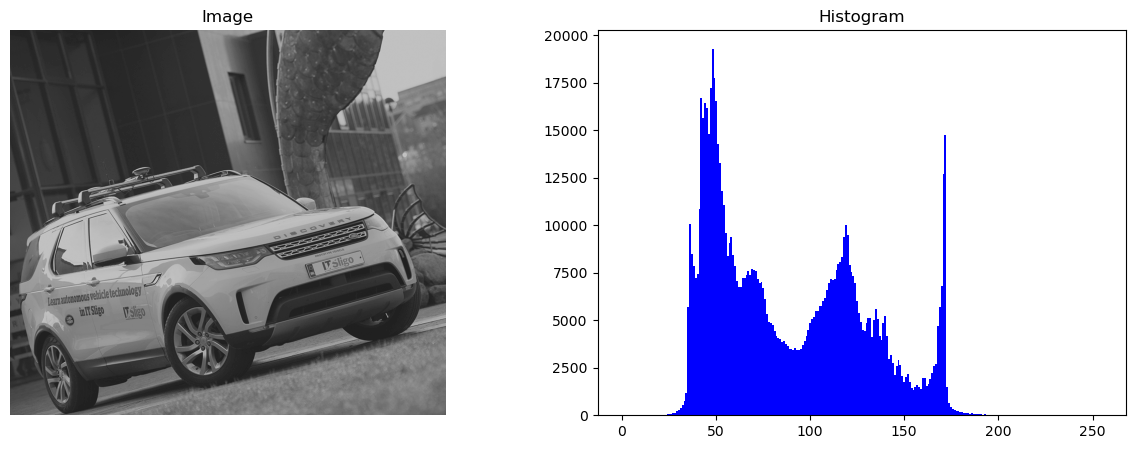

Noisy Image


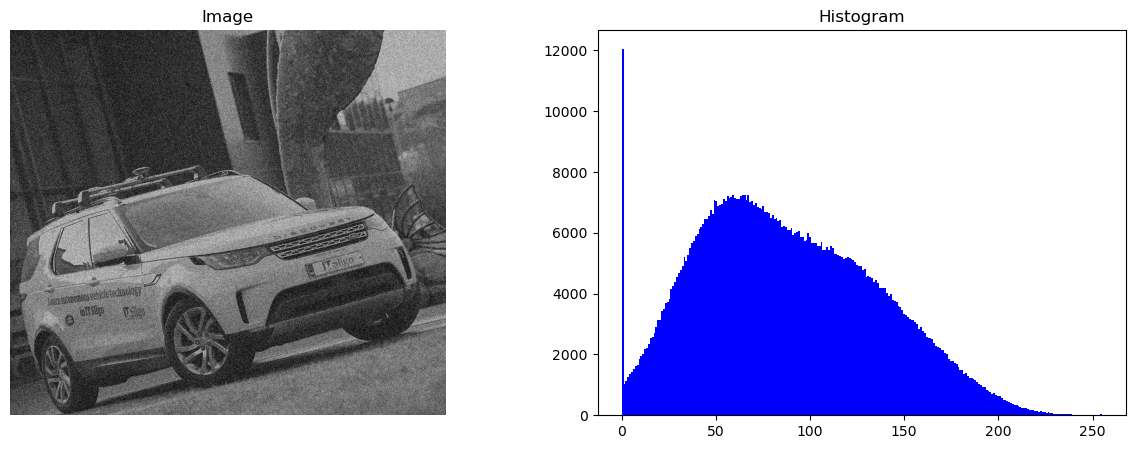

Filtered Image


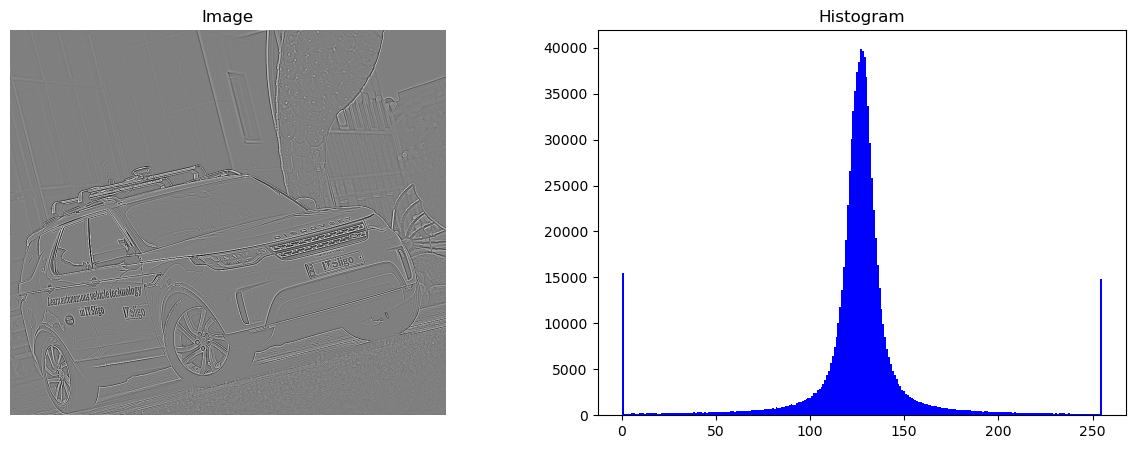

In [10]:
def add_gaussian_noise(image, mean=0, sigma=25):
    
    # Generate Gaussian noise
    noise = np.random.normal(mean, sigma, image.shape)
    
    # Add the noise to the image
    noisy_image = image+noise
    noisy_image[noisy_image<0]=0
    noisy_image[noisy_image>255]=255
    noisy_image = noisy_image.astype('uint8')
    
    
    
    return noisy_image


def convolve_image(image, kernel, delta=0):
    
    # Perform the convolution
    convolved_image = cv2.filter2D(image, -1, kernel, delta=delta)
    
    return convolved_image

# Define a 3x3 kernel, for example, a Laplacian kernel
lap_kernel = np.array([[ -1.0, -1.0, -1.0],
                       [ -1.0,  8.0, -1.0],
                       [ -1.0, -1.0, -1.0]])
box_kernel = (1/9.0)*np.array([[ 1, 1, 1],
                               [ 1,  1, 1],
                               [ 1, 1, 1]])

# Define a 5x5 kernel, for example, a Gaussian kernel
gaussian_kernel_5x5 = (1/256.0)*np.array([[ 1, 4, 6, 4, 1],
                                        [ 4, 16, 24, 16, 4],
                                        [ 6, 24, 36, 24, 6],
                                        [4, 16, 24, 16, 4],
                                        [ 1, 4, 6, 4, 1]])



# Path to your image
image_path = "images/CAV15LowContrast.jpg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
noisy_image = add_gaussian_noise(img, mean=0, sigma=25)

# Get the convolved image
convolved_img = convolve_image(img, lap_kernel, delta=127) 
#test what happens if you leave out the delta or set the delta to zero
print("Original Image")
display_image_histogram(img)
print("Noisy Image")
display_image_histogram(noisy_image)
print("Filtered Image")
display_image_histogram(convolved_img)  #display the output image and its histogram

## Non-linear neighbour operators

Not all noise has a gaussian or uniform distribution.

Shot noise for example, is noise where there are occasionally very large values.
By very large we mean well outside the range of the standard deviation of gaussian noise.

Regular blurring with a gaussian filter will make a change here but the one large pixel value will cause problems as it will overpower values close by.

Rather than being removed it widens them and does bring them down in value but they are still visible.

Rather than use the mean of the set of pixels within the receptive field of the filter we should instead get the median.

This can be slow to compute although algorithms exist to mitigate this somewhat.
For shot noise it works well but it is not efficient at averaging away Gaussian noise.

To combine the two, a filter called the $\alpha$-trimmed mean can be used.

This does a mean on all pixels that apart from some fraction $\alpha$ of the smallest and largest.



## The Bilateral Filter

None of the above filters deal well with the situation of an edge in the image that is legitimately part of the signal.

What occurs is that such edges are smoothed by the pixels close to them and we get the average along the edge rather than a sharp discontinuity.

The Bilateral Filter is a little like the $\alpha$-trimmed mean, but in this case they reject pixels, whose intensity differs too much from the central pixel.

So we smooth/average pixels that are close in value to the central pixel and by close we mean with some standard deviation of the pixel intensity.

\begin{equation}
    g(i,j) = \frac{\sum_{k,l}f(k,l)w(i,j,k,l)}{\sum_{k,l}w(i,j,k,l)}
\end{equation}
The weighting coefficient $w(i,j,k,l)$ is complex and needs to be broken down in to constituent parts. It's the product of a domain kernel
\begin{equation}
    d(i,j,k,l)=exp\left(-\frac{(i-k)^2+(j-l)^2)}{2\sigma^2_d}\right)
\end{equation}
and a range-kernel.
\begin{equation}
    r(i,j,k,l)=exp\left(-\frac{||f(i,j)-f(k,l)||^2}{2\sigma^2_r}\right)
\end{equation}

When multiplied together, these yield the data-dependent bilateral weight function.

\begin{equation}
    w(i,j,k,l)=exp\left(-\frac{(i-k)^2+(j-l)^2)}{2\sigma^2_d}-\frac{||f(i,j)-f(k,l)||^2}{2\sigma^2_r}\right)
\end{equation}

Original Image


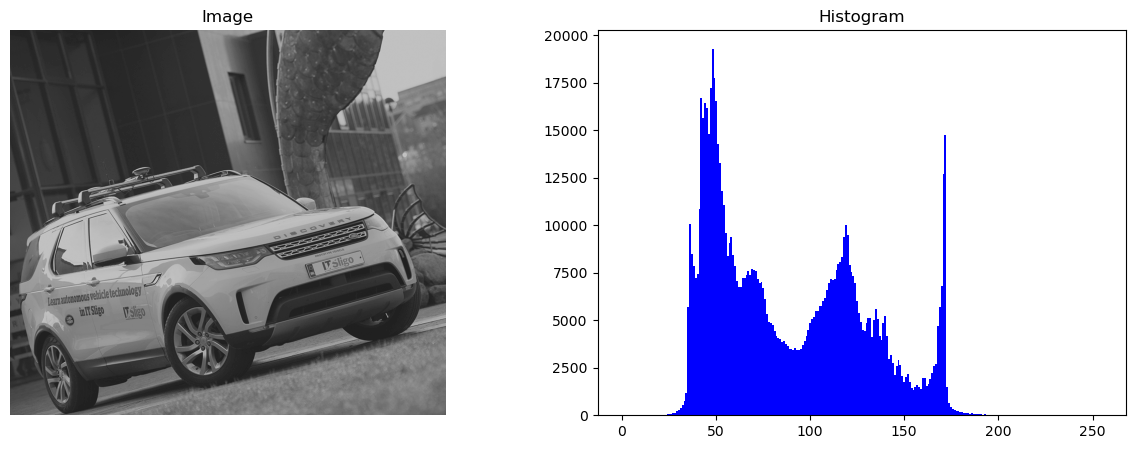

Noisy Image


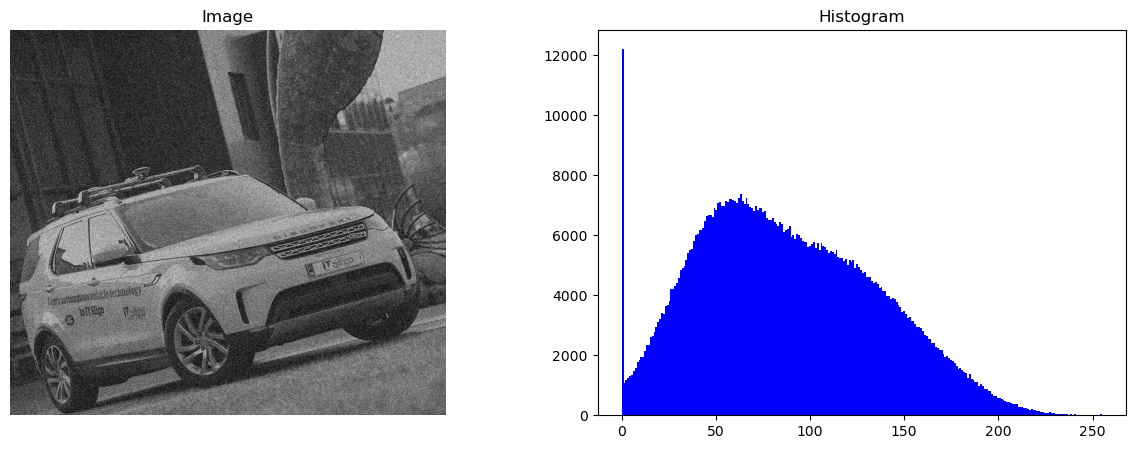

Filtered Image


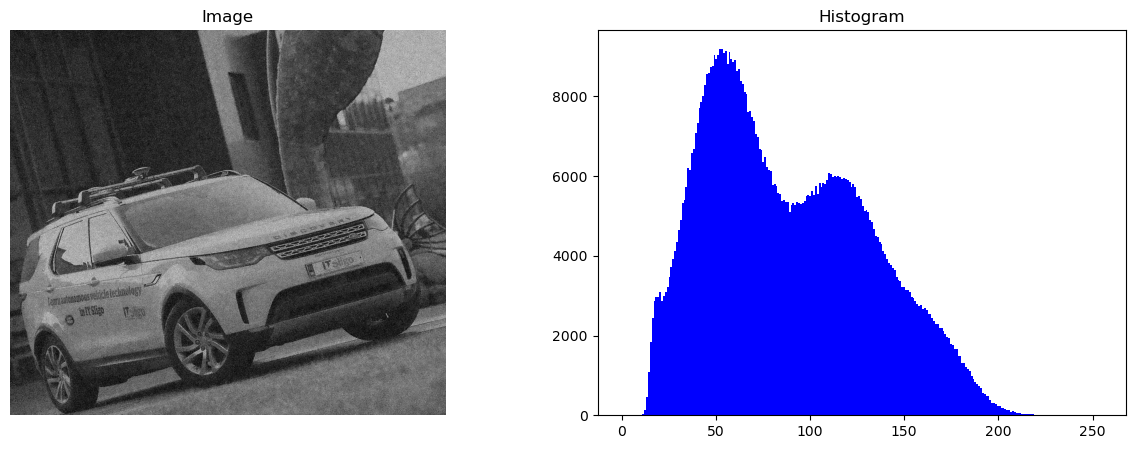

In [11]:
# Path to your image
image_path = "images/CAV15LowContrast.jpg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
noisy_image = add_gaussian_noise(img, mean=0, sigma=25)

# https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed
# see documentation above for what each of the 
filtered_image = cv2.bilateralFilter(noisy_image,d=15,sigmaColor=20,sigmaSpace=10)

print("Original Image")
display_image_histogram(img)
print("Noisy Image")
display_image_histogram(noisy_image)
print("Filtered Image")
display_image_histogram(filtered_image)  #display the output image and its histogram